## H1B Visa Approval and Refusal Rates Worldwide by Fiscal Year

In [1]:
import json
import numpy as np
import pymongo

with open('H1B_Visa_Approval_Refusal.Data.json', 'r') as file:
    data = json.load(file)

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['Data']  

for item in data:
    record = {
        'Fiscal_Year': item['Fiscal_Year'],
        'Approval_Rate': float(item['Approval_Rate'].rstrip('%')),
        'Refusal_Rate': float(item['Refusal_Rate'].rstrip('%'))
    }
    collection.insert_one(record)

print("Data inserted into MongoDB successfully!")

Data inserted into MongoDB successfully!


In [2]:
import pandas as pd
from pymongo import MongoClient

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['Data'] 

data = collection.find({}, {'_id': 0})

documents = list(data)

df = pd.DataFrame(documents)

print(df)

    Fiscal_Year  Approval_Rate  Refusal_Rate
0          2013          86.88         13.12
1          2014          89.95         10.05
2          2015          89.88         10.12
3          2016          88.42         11.58
4          2017          83.16         16.84
5          2018          77.76         22.24
6          2019          97.99          2.01
7          2020          97.26          2.74
8          2021          92.85          7.15
9          2022          97.62          2.38
10         2023          97.88          2.12


In [3]:
cursor = collection.find({'Approval_Rate': {'$gt': 90}})

for document in cursor:
    document.pop('_id', None)
    print(document)

{'Fiscal_Year': 2019, 'Approval_Rate': 97.99, 'Refusal_Rate': 2.01}
{'Fiscal_Year': 2020, 'Approval_Rate': 97.26, 'Refusal_Rate': 2.74}
{'Fiscal_Year': 2021, 'Approval_Rate': 92.85, 'Refusal_Rate': 7.15}
{'Fiscal_Year': 2022, 'Approval_Rate': 97.62, 'Refusal_Rate': 2.38}
{'Fiscal_Year': 2023, 'Approval_Rate': 97.88, 'Refusal_Rate': 2.12}


In [4]:
pipeline = [
    {'$group': {'_id': None, 'avg_Approval_Rate': {'$avg': '$Approval_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Approval_Rate': 90.87727272727273}


In [5]:
pipeline = [
    {'$group': {'_id': None, 'avg_Refusal_Rate': {'$avg': '$Refusal_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Refusal_Rate': 9.122727272727273}


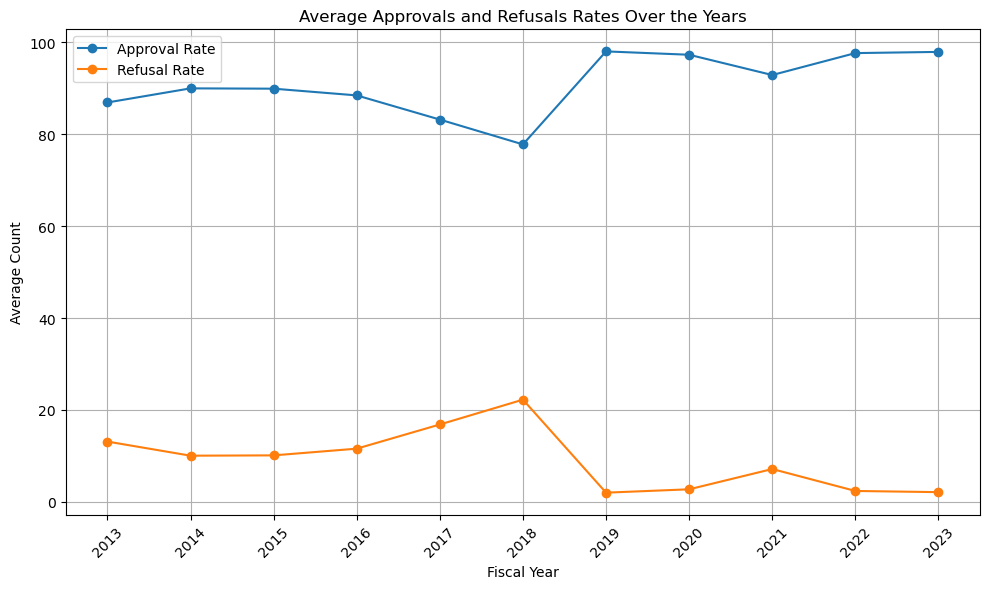

In [6]:
import matplotlib.pyplot as plt

data = collection.find({}, {'Fiscal_Year': 1, 'Approval_Rate': 1, 'Refusal_Rate': 1})

years = []
approvals = []
refusals = []

for record in data:
    years.append(record['Fiscal_Year'])
    approvals.append(record['Approval_Rate'])  
    refusals.append(record['Refusal_Rate'])    

plt.figure(figsize=(10, 6))
plt.plot(years, approvals, marker='o', label='Approval Rate')
plt.plot(years, refusals, marker='o', label='Refusal Rate')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Count')
plt.title('Average Approvals and Refusals Rates Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)  
plt.tight_layout()
plt.show()


## H1B India

In [7]:
import json
import numpy as np
import pymongo

with open('H1B_India.json', 'r') as file:
    data = json.load(file)

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['H1B Visa Approval and Rejection rates for India']  

for item in data:
    record = {
        'Fiscal_Year': item['Fiscal_Year'],
        'Approval_Rate': float(item['Approval_Rate'].rstrip('%')),
        'Refusal_Rate': float(item['Refusal_Rate'].rstrip('%'))
    }
    collection.insert_one(record)

print("Data inserted into MongoDB successfully!")

Data inserted into MongoDB successfully!


In [8]:
import pandas as pd
from pymongo import MongoClient

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['H1B Visa Approval and Rejection rates for India'] 

data = collection.find({}, {'_id': 0})

documents = list(data)

df = pd.DataFrame(documents)

print(df)

  Fiscal_Year  Approval_Rate  Refusal_Rate
0     FY 2018          77.76         22.24
1     FY 2019          97.99          2.01
2     FY 2020          97.26          2.74
3     FY 2021          92.85          7.15
4     FY 2022          97.62          2.38


In [9]:
cursor = collection.find({'Approval_Rate': {'$gt': 90}})

for document in cursor:
    document.pop('_id', None)
    print(document)

{'Fiscal_Year': 'FY 2019', 'Approval_Rate': 97.99, 'Refusal_Rate': 2.01}
{'Fiscal_Year': 'FY 2020', 'Approval_Rate': 97.26, 'Refusal_Rate': 2.74}
{'Fiscal_Year': 'FY 2021', 'Approval_Rate': 92.85, 'Refusal_Rate': 7.15}
{'Fiscal_Year': 'FY 2022', 'Approval_Rate': 97.62, 'Refusal_Rate': 2.38}


In [10]:
pipeline = [
    {'$group': {'_id': None, 'avg_Approval_Rate': {'$avg': '$Approval_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)


{'avg_Approval_Rate': 92.696}


In [11]:
pipeline = [
    {'$group': {'_id': None, 'avg_Refusal_Rate': {'$avg': '$Refusal_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Refusal_Rate': 7.303999999999999}


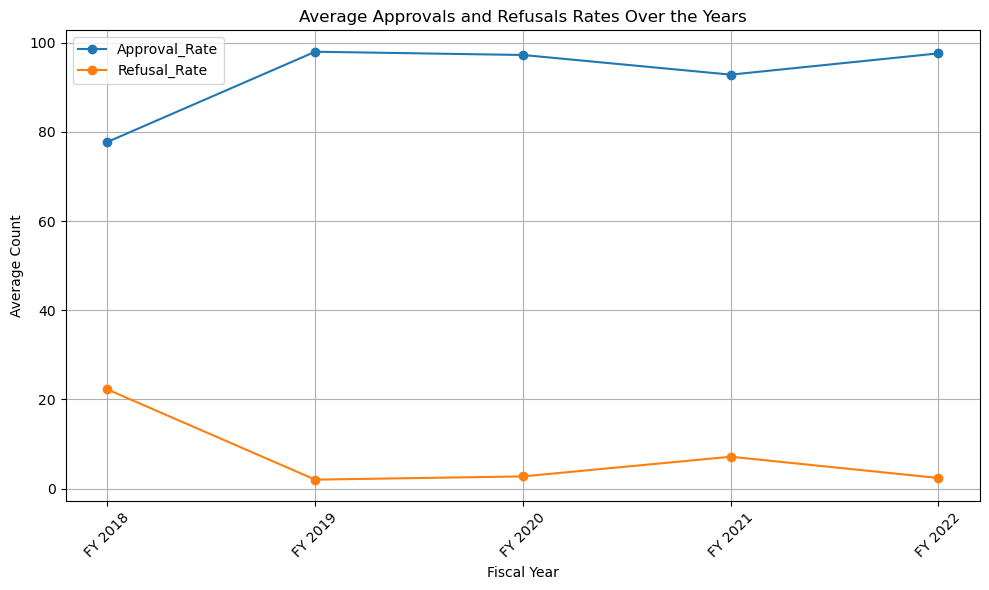

In [12]:
data = collection.find({}, {'Fiscal_Year': 1, 'Approval_Rate': 1, 'Refusal_Rate': 1})

year_data = {}

for record in data:
    year = record['Fiscal_Year']
    if year not in year_data:
        year_data[year] = {'Approval_Rate': [], 'Refusal_Rate': []}
    year_data[year]['Approval_Rate'].append(record['Approval_Rate'])
    year_data[year]['Refusal_Rate'].append(record['Refusal_Rate'])

years = []
avg_Approval_Rate = []
avg_Refusal_Rate = []

for year, data in year_data.items():
    years.append(year)
    avg_Approval_Rate.append(sum(data['Approval_Rate']) / len(data['Approval_Rate']))
    avg_Refusal_Rate.append(sum(data['Refusal_Rate']) / len(data['Refusal_Rate']))

plt.figure(figsize=(10, 6))
plt.plot(years, avg_Approval_Rate, marker='o', label='Approval_Rate')
plt.plot(years, avg_Refusal_Rate, marker='o', label='Refusal_Rate')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Count')
plt.title('Average Approvals and Refusals Rates Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## H1B Australia

In [13]:
import json
import numpy as np
import pymongo

with open('H1B_Australia.json', 'r') as file:
    data = json.load(file)

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['H1B Visa Approval and Rejection rates in Australia']  

for item in data:
    record = {
        'Fiscal_Year': item['Fiscal_Year'],
        'Approval_Rate': float(item['Approval_Rate'].rstrip('%')),
        'Refusal_Rate': float(item['Refusal_Rate'].rstrip('%'))
    }
    collection.insert_one(record)

print("Data inserted into MongoDB successfully!")

Data inserted into MongoDB successfully!


In [14]:
import pandas as pd
from pymongo import MongoClient

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['H1B Visa Approval and Rejection rates in Australia'] 

data = collection.find({}, {'_id': 0})

documents = list(data)

df = pd.DataFrame(documents)

print(df)

  Fiscal_Year  Approval_Rate  Refusal_Rate
0     FY 2018          77.89         22.11
1     FY 2019          98.13          1.88
2     FY 2020          97.27          2.73
3     FY 2021          93.55          6.45
4     FY 2022          97.68          2.32


In [15]:
cursor = collection.find({'Approval_Rate': {'$gt': 90}})

for document in cursor:
    document.pop('_id', None)
    print(document)

{'Fiscal_Year': 'FY 2019', 'Approval_Rate': 98.13, 'Refusal_Rate': 1.88}
{'Fiscal_Year': 'FY 2020', 'Approval_Rate': 97.27, 'Refusal_Rate': 2.73}
{'Fiscal_Year': 'FY 2021', 'Approval_Rate': 93.55, 'Refusal_Rate': 6.45}
{'Fiscal_Year': 'FY 2022', 'Approval_Rate': 97.68, 'Refusal_Rate': 2.32}


In [16]:
pipeline = [
    {'$group': {'_id': None, 'avg_Approval_Rate': {'$avg': '$Approval_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Approval_Rate': 92.904}


In [17]:
pipeline = [
    {'$group': {'_id': None, 'avg_Refusal_Rate': {'$avg': '$Refusal_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Refusal_Rate': 7.098000000000001}


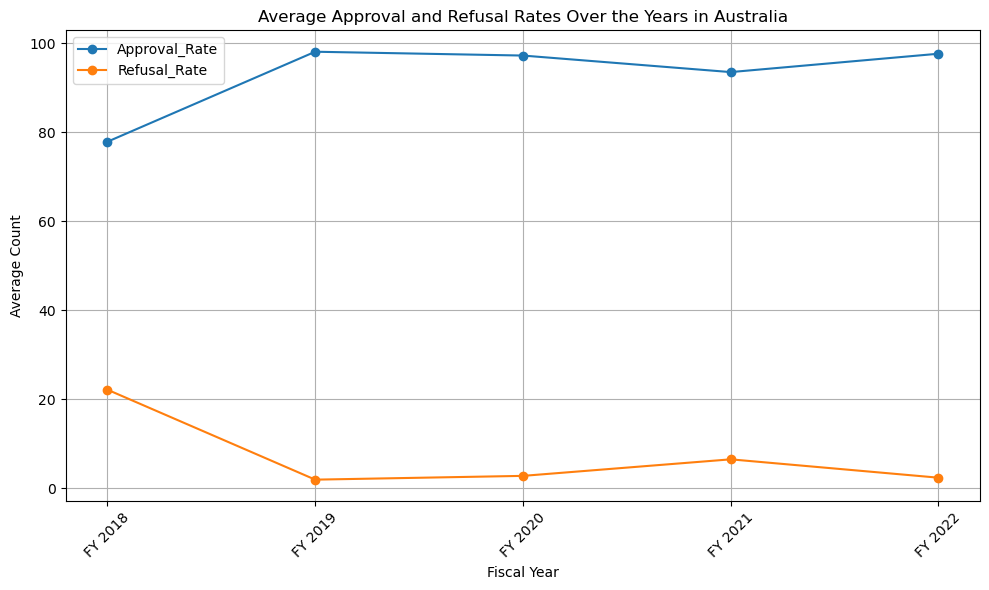

In [18]:
data = collection.find({}, {'Fiscal_Year': 1, 'Approval_Rate': 1, 'Refusal_Rate': 1})

years = []
approvals = []
refusals = []

for record in data:
    years.append(record['Fiscal_Year'])
    approvals.append(record['Approval_Rate'])
    refusals.append(record['Refusal_Rate'])

plt.figure(figsize=(10, 6))
plt.plot(years, approvals, marker='o', label='Approval_Rate')
plt.plot(years, refusals, marker='o', label='Refusal_Rate')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Count')
plt.title('Average Approval and Refusal Rates Over the Years in Australia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## H1B France

In [19]:
import json
import numpy as np
import pymongo


with open('H1B_France.json', 'r') as file:
    data = json.load(file)


client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['H1B Visa Approval and Rejection rates in France'] 

for item in data:
    record = {
        'Fiscal_Year': item['Fiscal_Year'],
        'Approval_Rate': float(item['Approval_Rate'].rstrip('%')),
        'Refusal_Rate': float(item['Refusal_Rate'].rstrip('%'))
    }
    collection.insert_one(record)

print("Data inserted into MongoDB successfully!")

Data inserted into MongoDB successfully!


In [20]:
import pandas as pd
from pymongo import MongoClient

client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['H1B_Visa_Approval']
collection = db['H1B Visa Approval and Rejection rates in France'] 

data = collection.find({}, {'_id': 0})

documents = list(data)

df = pd.DataFrame(documents)

print(df)

  Fiscal_Year  Approval_Rate  Refusal_Rate
0     FY 2018          77.80         22.20
1     FY 2019          98.07          1.94
2     FY 2020          97.36          2.64
3     FY 2021          93.20          6.80
4     FY 2022          97.64          2.36


In [21]:
cursor = collection.find({'Approval_Rate': {'$gt': 90}})

for document in cursor:
    document.pop('_id', None)
    print(document)

{'Fiscal_Year': 'FY 2019', 'Approval_Rate': 98.07, 'Refusal_Rate': 1.94}
{'Fiscal_Year': 'FY 2020', 'Approval_Rate': 97.36, 'Refusal_Rate': 2.64}
{'Fiscal_Year': 'FY 2021', 'Approval_Rate': 93.2, 'Refusal_Rate': 6.8}
{'Fiscal_Year': 'FY 2022', 'Approval_Rate': 97.64, 'Refusal_Rate': 2.36}


In [22]:
pipeline = [
    {'$group': {'_id': None, 'avg_Approval_Rate': {'$avg': '$Approval_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Approval_Rate': 92.814}


In [23]:
pipeline = [
    {'$group': {'_id': None, 'avg_Refusal_Rate': {'$avg': '$Refusal_Rate'}}}
]

result = collection.aggregate(pipeline)

for doc in result:
    doc.pop('_id', None)
    print(doc)

{'avg_Refusal_Rate': 7.188}


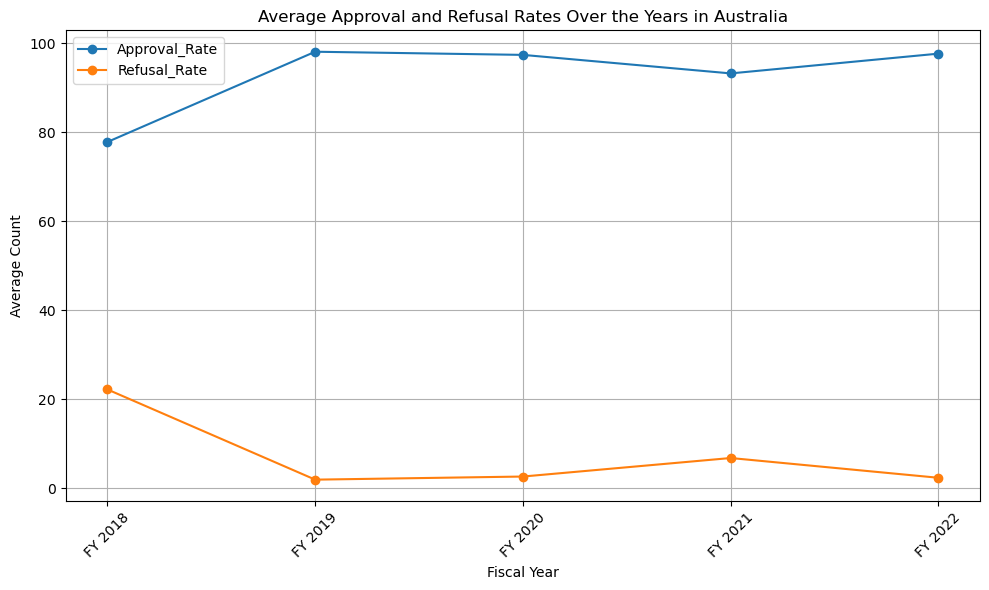

In [24]:
data = collection.find({}, {'Fiscal_Year': 1, 'Approval_Rate': 1, 'Refusal_Rate': 1})

years = []
approvals = []
refusals = []

for record in data:
    years.append(record['Fiscal_Year'])
    approvals.append(record['Approval_Rate'])
    refusals.append(record['Refusal_Rate'])

plt.figure(figsize=(10, 6))
plt.plot(years, approvals, marker='o', label='Approval_Rate')
plt.plot(years, refusals, marker='o', label='Refusal_Rate')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Count')
plt.title('Average Approval and Refusal Rates Over the Years in France')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()